In [1]:
import matplotlib.pyplot as plt
import cv2

import scipy

from pathlib import Path

import numpy as np

import h5py
import math

import pandas as pd

import holoviews as hv

import platform

import sys
sys.path.insert(0, "..")

from pathlib import Path

import cv2


from Utilities.Utils import *
from Utilities.Processing import *

In [2]:
# This is a function to load the ball coordinates from the .analysis.h5 file

filename ="/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.001_arena1_corridor_2.analysis.h5"
with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.001_arena1_corridor_2.analysis.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

With multiple h5 files

In [ ]:
inputfolder = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/")

# Build a dataframe that will store the ball y positions and the arena and corridor numbers as metadata

df = pd.DataFrame(columns=["yball", "arena", "corridor"])

# Loop over all the .analysis.h5 files in the folder and store the ball y positions and the arena and corridor numbers as metadata

for file in inputfolder.glob("*.analysis.h5"):
    print(file)
    with h5py.File(file, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]

    locations.shape

    yball : np.ndarray = locations[:, :, 1, :]

   

    # Get the arena and corridor numbers from the filename
    filename = file.name
    arena = filename.split("_")[4]
    corridor = filename.split("_")[5] + filename.split("_")[6][0]

     # If arena is 4, 5 or 6, revert the y coordinates
    if arena == "arena2" or arena == "arena5" or arena == "arena8":
        yball[:, 0, 0] = -yball[:, 0, 0]
    
    # Store the ball y positions and the arena and corridor numbers as metadata
    df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
    
# Unpack yball positions

df = df.explode("yball")
df['time'] = df.groupby(['arena', 'corridor']).cumcount() / 30

df['Fly'] = 'Fly' + (df.groupby(['arena', 'corridor']).ngroup() + 1).astype(str)

df.head()

In [ ]:
# Get the corresponding video path
video_path = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/Test2_Videos/Videos_NumOrdered/arena1_corridor_2.mp4")

outpath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/LabeledTest.mp4")

In [ ]:
locations[0][0][0]

In [ ]:
# For the first 15O frames of the video, plot the ball coordinates

startFrame = 4000   # only variables you need to change to run the code
endFrame = 6600     # start and end frame of the abstract that you want to record

videoCapture = cv2.VideoCapture(video_path.as_posix()) #TODO change the pathname

# Make a video writer
fps = 30
frameSize = (int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(outpath.as_posix(), fourcc, fps, frameSize)



# Read the video and for each frame plot a circle at the ball coordinates
frameNumber = 0
while True:
    ret, frame = videoCapture.read()
    if not ret:
        break

    frameNumber += 1
    print(frameNumber)

    if startFrame <= frameNumber <= endFrame:

        # get the skeleton of the frame
        cv2.circle(frame, (int(locations[frameNumber][0][0]), int(locations[frameNumber][0][1])), 5, (0, 0, 255), -1)
        #cv2.imshow("frame", frame)
        out.write(frame)

    if frameNumber > endFrame:
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  # to quit the video press q
    
    
videoCapture.release()
out.release()
cv2.destroyAllWindows()
    

In [ ]:
ImagePath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/Test2/image0.jpg")



img = cv2.imread(ImagePath.as_posix())

In [ ]:
locations.shape

In [ ]:
yball : np.ndarray = locations[:, :, 1, :]

In [ ]:
# plot the y coordinates of the ball
plt.plot(yball[:, 0, 0])

In [ ]:
inputfolder = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/")

# Build a dataframe that will store the ball y positions and the arena and corridor numbers as metadata

df = pd.DataFrame(columns=["yball", "arena", "corridor"])

# Loop over all the .analysis.h5 files in the folder and store the ball y positions and the arena and corridor numbers as metadata

for file in inputfolder.glob("*.analysis.h5"):
    print(file)
    with h5py.File(file, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]

    locations.shape

    yball : np.ndarray = locations[:, :, 1, :]

   

    # Get the arena and corridor numbers from the filename
    filename = file.name
    arena = filename.split("_")[4]
    corridor = filename.split("_")[5] + filename.split("_")[6][0]

     # If arena is 4, 5 or 6, revert the y coordinates
    if arena == "arena2" or arena == "arena5" or arena == "arena8":
        yball[:, 0, 0] = -yball[:, 0, 0]
    
    # Store the ball y positions and the arena and corridor numbers as metadata
    df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
    
# Unpack yball positions

df = df.explode("yball")
df['time'] = df.groupby(['arena', 'corridor']).cumcount() / 30

df['Fly'] = 'Fly' + (df.groupby(['arena', 'corridor']).ngroup() + 1).astype(str)

df.head()
    





In [ ]:
# Get the first value of yball for each arena and corridor

df_first = df.groupby(['arena', 'corridor']).first().reset_index()

# Same for last value

df_last = df.groupby(['arena', 'corridor']).last().reset_index()

In [ ]:
cutoff = 0.01  # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
order = 1  # sin wave can be approx represented as quadratic

df['ysmooth'] = butter_lowpass_filter(df['yball'], cutoff, order)

In [ ]:
# Make new column where for each fly the lowest yball value is 0 and the rest is relative to that

df['yball_relative'] = df['yball'] - df_first['yball']

In [ ]:
Grouped = df.groupby(['time',]).mean().reset_index()

In [ ]:
Confints = df.groupby(['time'])['yball_relative'].apply(lambda x: draw_bs_ci(x, n_reps=300))

In [ ]:
Confints_process = Confints.reset_index()

# Split values of Confints_process["cumulated_success"] into two columns ci_lower and ci_upper
Confints_process[["ci_lower", "ci_upper"]] = pd.DataFrame(
    Confints_process["yball_relative"].tolist(), index=Confints_process.index
)


In [ ]:

Grouped["ci_lower"] = Confints_process["ci_lower"]
Grouped["ci_upper"] = Confints_process["ci_upper"]

In [ ]:
# Plot the ball y positions as function of time for each fly and display it as a grid with matplotlib

Flynum = 54

# Compute the number of rows and columns for the grid
nrows = math.ceil(math.sqrt(Flynum))
ncols = math.ceil(Flynum / nrows)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
axs = axs.flatten()

# Find the minimum and maximum y values across all subplots
ymin = df['yball'].min()
ymax = df['yball'].max()

for i, fly in enumerate(df['Fly'].unique()):
    df[df['Fly'] == fly].plot(x='time', y='yball', ax=axs[i], title=fly, legend=False)
    axs[i].set_ylim(ymin, ymax)
    
# Set the same x and y labels for all subplots
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')
fig.text(0.06, 0.5, 'Y position (px)', ha='center', va='center', rotation='vertical')
    
plt.tight_layout()

In [ ]:
# Adjust plot size to make everything bigger
plt.rcParams['figure.figsize'] = [15, 15]
# Change font size accordingly
plt.rcParams.update({'font.size': 18})

# Compute mean relative yball position across flies for each time point
df_mean = df.groupby('time').mean().reset_index()

# Compute upper and lower confidence intervals
# (replace this with your own code to compute the confidence intervals)
upper = Grouped['ci_upper']
lower = Grouped['ci_lower']

# Plot the mean relative yball position as function of time and display it
plt.plot(df_mean['time'], df_mean['yball_relative'])
plt.fill_between(df_mean['time'], lower, upper, alpha=0.2)
plt.xlabel('Time (s)')
plt.ylabel('Mean relative yball position (px)')

In [ ]:
grouped = df.groupby('Fly')
for name, group in grouped:
    print(name)
    print(group)

In [ ]:
inputfolder2 = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full")


In [ ]:

# Build a dataframe that will store the ball y positions and the arena and corridor numbers as metadata

df2 = pd.DataFrame(columns=["yball", "arena", "corridor"])

# Loop over all the .analysis.h5 files in the folder and store the ball y positions and the arena and corridor numbers as metadata

for file in inputfolder2.glob("*.analysis.h5"):
    print(file)
    with h5py.File(file, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]

    locations.shape

    yball : np.ndarray = locations[:, :, 1, :]

   

    # Get the arena and corridor numbers from the filename
    filename = file.name
    arena = filename.split("_")[4]
    corridor = filename.split("_")[5] + filename.split("_")[6][0]

     # If arena is 4, 5 or 6, revert the y coordinates
    #if arena == "arena2" or arena == "arena5" or arena == "arena8":
    if arena == "arena1" or arena == "arena3" or arena == "arena4" or arena == "arena6" or arena == "arena7" or arena == "arena9":
        yball[:, 0, 0] = -yball[:, 0, 0]
    
    # Store the ball y positions and the arena and corridor numbers as metadata
    df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
    
# Unpack yball positions

df2 = df2.explode("yball")
df2['time'] = df2.groupby(['arena', 'corridor']).cumcount() / 30

df2['Fly'] = 'Fly' + (df2.groupby(['arena', 'corridor']).ngroup() + 1).astype(str)

df2.head()

In [ ]:
# Get the first value of yball for each arena and corridor

df2_first = df2.groupby(['arena', 'corridor']).first().reset_index()

# Same for last value

df2_last = df2.groupby(['arena', 'corridor']).last().reset_index()

In [ ]:
# Make new column where for each fly the lowest yball value is 0 and the rest is relative to that

df2['yball_relative'] = df2['yball'] - df2_first['yball']

In [ ]:
# Plot the ball y positions as function of time for each fly and display it as a grid with matplotlib

Flynum = 54

# Compute the number of rows and columns for the grid
nrows = math.ceil(math.sqrt(Flynum))
ncols = math.ceil(Flynum / nrows)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
axs = axs.flatten()

# Find the minimum and maximum y values across all subplots
ymin = df2['yball_relative'].min()
ymax = df2['yball_relative'].max()

for i, fly in enumerate(df2['Fly'].unique()):
    df2[df2['Fly'] == fly].plot(x='time', y='yball_relative', ax=axs[i], title=fly, legend=False, color='orange')
    axs[i].set_ylim(ymin, ymax)
    
# Set the same x and y labels for all subplots
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')
fig.text(0.06, 0.5, 'Y position (px)', ha='center', va='center', rotation='vertical')
    
plt.tight_layout()

In [ ]:
Grouped2 = df2.groupby(['time',]).mean().reset_index()



In [ ]:
Confints2 = df2.groupby(['time'])['yball_relative'].apply(lambda x: draw_bs_ci(x, n_reps=300))


In [ ]:

Confints_process2 = Confints2.reset_index()



In [ ]:
# Split values of Confints_process["cumulated_success"] into two columns ci_lower and ci_upper
Confints_process2[["ci_lower", "ci_upper"]] = pd.DataFrame(
    Confints_process2["yball_relative"].tolist(), index=Confints_process2.index
)

Grouped2["ci_lower"] = Confints_process2["ci_lower"]
Grouped2["ci_upper"] = Confints_process2["ci_upper"]

In [ ]:
# Adjust plot size to make everything bigger
plt.rcParams['figure.figsize'] = [15, 15]
# Change font size accordingly
plt.rcParams.update({'font.size': 18})

# Compute mean relative yball position across flies for each time point
df2_mean = df2.groupby('time').mean().reset_index()

df2_mean["ci_lower"] = Confints_process2["ci_lower"]
df2_mean["ci_upper"] = Confints_process2["ci_upper"]

# Compute upper and lower confidence intervals
# (replace this with your own code to compute the confidence intervals)
upper2 = Grouped2['ci_upper']
lower2 = Grouped2['ci_lower']

# Plot the mean relative yball position as function of time and display it
plt.plot(df2_mean['time'], df2_mean['yball_relative'], color='orange')
plt.fill_between(df2_mean['time'], lower2, upper2, alpha=0.2, color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Mean relative yball position (px)')

In [ ]:
# plot both df1 and df2 mean curves with confidence intervals on the same plot

plt.plot(df_mean['time'], df_mean['yball_relative'], color='blue')

plt.plot(df2_mean['time'], df2_mean['yball_relative'], color='orange')
plt.legend(['Control', 'Darkish'])
plt.fill_between(df_mean['time'], lower, upper, alpha=0.1, color='blue')
plt.fill_between(df2_mean['time'], lower2, upper2, alpha=0.1, color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Mean relative yball position (px)')
# Add a legend with blue bar being control and orange bar being darkish


Saving

In [ ]:
savepath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Datasets")

In [ ]:
checksave(
    path=savepath.joinpath("230606_Darkish_1_Averaged.feather"),
    object="dataframe",
    file=df2_mean,
)

 I added a small change here

# New pipeline

In [1]:
import matplotlib.pyplot as plt
import cv2

import scipy

from pathlib import Path

import numpy as np

import h5py
import math


import pandas as pd

import holoviews as hv

import platform

import sys
sys.path.insert(0, "..")

from pathlib import Path

import cv2


from Utilities.Utils import *
from Utilities.Processing import *

In [2]:
# Get the DataFolder

if platform.system() == "Darwin":
    DataPath = Path("/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos")
# Linux Datapath
if platform.system() == "Linux":
    DataPath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos")

print(DataPath)

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos


In [3]:
# Make a list of the folders I want to use
# For instance, I want to use the folders that have the "FeedingState" in the name

Folders = []
for folder in DataPath.iterdir():
    minfolder = str(folder).lower()
    #if "tnt" in minfolder and "tracked" in minfolder and "pm" in minfolder:
    if 'feedingstate' in minfolder:
        Folders.append(folder)

Folders
    

[PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230705_FeedingState_2_PM_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230705_FeedingState_2_AM_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230706_FeedingState_3_PM_Flipped_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230704_FeedingState_1_PM_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230721_Feedingstate_4_PM_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230725_FeedingState_PM_Dark_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder

In [4]:
import json

# Build a dataframe that will store the ball y positions and the arena and corridor numbers as metadata

Dataset = pd.DataFrame(columns=["Fly", "yball", "arena", "corridor"])

# Loop over all the .analysis.h5 files in the folder and store the ball y positions and the arena and corridor numbers as metadata

Flynum = 0
# Loop over all the foldes that don't have "Dark" in the name
for folder in Folders:
    # Read the metadata.json file
    with open(folder / "Metadata.json", "r") as f:
        metadata = json.load(f)
        variables = metadata["Variable"]
        metadata_dict = {}
        for var in variables:
            metadata_dict[var] = {}
            for arena in range(1, 10):
                arena_key = f"Arena{arena}"
                var_index = variables.index(var)
                metadata_dict[var][arena_key] = metadata[arena_key][var_index]
        
        print (metadata_dict)
        
    for file in folder.glob("**/*.analysis.h5"):
        #print(file)
        with h5py.File(file, "r") as f:
            dset_names = list(f.keys())
            locations = f["tracks"][:].T
            node_names = [n.decode() for n in f["node_names"][:]]

        locations.shape
        
        if "Flipped" in folder.name:
            yball[:, 0, 0] = -yball[:, 0, 0]

        else:
            yball : np.ndarray = locations[:, :, 1, :]
        
        # Get the filename from the path
        foldername = folder.name

        # Get the arena and corridor numbers from the parent (corridor) and grandparent (arena) folder names
        arena = file.parent.parent.name
        corridor = file.parent.name
        
        # Get the metadata for this arena
        arena_key = arena.capitalize()
        arena_metadata = {var: metadata_dict[var][arena_key] for var in metadata_dict}
        
        Flynum += 1
        
        # Store the ball y positions and the arena and corridor numbers as metadata
        data = {"Fly": "Fly" + str(Flynum),
                "yball": yball[:, 0, 0], 
                "experiment": foldername,
                "arena": arena, 
                "corridor": corridor}
        data.update(arena_metadata)
        Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)



{'Date': {'Arena1': '230705', 'Arena2': '230705', 'Arena3': '230705', 'Arena4': '230705', 'Arena5': '230705', 'Arena6': '230705', 'Arena7': '230705', 'Arena8': '230705', 'Arena9': '230705'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'fed', 'Arena8': 'fed', 'Arena9': 'fed'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'Arena1': 'on', 'Arena2': 'on', 'Arena3': 'on', 'Arena4': 'on', 'Arena5': 'on', 'Arena6': 'on', 

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230705', 'Arena2': '230705', 'Arena3': '230705', 'Arena4': '230705', 'Arena5': '230705', 'Arena6': '230705', 'Arena7': '230705', 'Arena8': '230705', 'Arena9': '230705'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'AM', 'Arena2': 'AM', 'Arena3': 'AM', 'Arena4': 'AM', 'Arena5': 'AM', 'Arena6': 'AM', 'Arena7': 'AM', 'Arena8': 'AM', 'Arena9': 'AM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'fed', 'Arena8': 'fed', 'Arena9': 'fed'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'Arena1': 'on', 'Arena2': 'on', 'Arena3': 'on', 'Arena4': 'on', 'Arena5': 'on', 'Arena6': 'on', 

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230706', 'Arena2': '230706', 'Arena3': '230706', 'Arena4': '230706', 'Arena5': '230706', 'Arena6': '230706', 'Arena7': '230706', 'Arena8': '230706', 'Arena9': '230706'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'fed', 'Arena8': 'fed', 'Arena9': 'fed'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'Arena1': 'on', 'Arena2': 'on', 'Arena3': 'on', 'Arena4': 'on', 'Arena5': 'on', 'Arena6': 'on', 

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230704', 'Arena2': '230704', 'Arena3': '230704', 'Arena4': '230704', 'Arena5': '230704', 'Arena6': '230704', 'Arena7': '230704', 'Arena8': '230704', 'Arena9': '230704'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'fed', 'Arena8': 'fed', 'Arena9': 'fed'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'Arena1': 'on', 'Arena2': 'on', 'Arena3': 'on', 'Arena4': 'on', 'Arena5': 'on', 'Arena6': 'on', 

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230704', 'Arena2': '230704', 'Arena3': '230704', 'Arena4': '230704', 'Arena5': '230704', 'Arena6': '230704', 'Arena7': '230704', 'Arena8': '230704', 'Arena9': '230704'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'AM', 'Arena2': 'AM', 'Arena3': 'AM', 'Arena4': 'AM', 'Arena5': 'AM', 'Arena6': 'AM', 'Arena7': 'AM', 'Arena8': 'AM', 'Arena9': 'AM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'Fed', 'Arena8': 'Fed', 'Arena9': 'Fed'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'Arena1': 'on', 'Arena2': 'on', 'Arena3': 'on', 'Arena4': 'on', 'Arena5': 'on', 'Arena6': 'on', 

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230721', 'Arena2': '230721', 'Arena3': '230721', 'Arena4': '230721', 'Arena5': '230721', 'Arena6': '230721', 'Arena7': '230721', 'Arena8': '230721', 'Arena9': '230721'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'fed', 'Arena2': 'fed', 'Arena3': 'fed', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'starved_noWater', 'Arena8': 'starved_noWater', 'Arena9': 'starved_noWater'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'Arena1': 'on', 'Arena2': 'on', 'Arena3': 'on', 'Arena4': 'on', 'Arena5': 'on', 'Arena6': 'on', 

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230725', 'Arena2': '230725', 'Arena3': '230725', 'Arena4': '230725', 'Arena5': '230725', 'Arena6': '230725', 'Arena7': '230725', 'Arena8': '230725', 'Arena9': '230725'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'fed', 'Arena2': 'fed', 'Arena3': 'fed', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'starved_noWater', 'Arena8': 'starved_noWater', 'Arena9': 'starved_noWater'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'Arena1': 'off', 'Arena2': 'off', 'Arena3': 'off', 'Arena4': 'off', 'Arena5': 'off', 'Arena6': '

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230728', 'Arena2': '230728', 'Arena3': '230728', 'Arena4': '230728', 'Arena5': '230728', 'Arena6': '230728', 'Arena7': '230728', 'Arena8': '230728', 'Arena9': '230728'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'starved', 'Arena2': 'starved', 'Arena3': 'starved', 'Arena4': 'starved_noWater', 'Arena5': 'starved_noWater', 'Arena6': 'starved_noWater', 'Arena7': 'fed', 'Arena8': 'fed', 'Arena9': 'fed'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'Arena1': 'off', 'Arena2': 'off', 'Arena3': 'off', 'Arena4': 'off', 'Arena5': 'off', 'Arena6': '

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230727', 'Arena2': '230727', 'Arena3': '230727', 'Arena4': '230727', 'Arena5': '230727', 'Arena6': '230727', 'Arena7': '230727', 'Arena8': '230727', 'Arena9': '230727'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'fed', 'Arena8': 'fed', 'Arena9': 'fed'}, 'Orientation': {'Arena1': 'flipped', 'Arena2': 'flipped', 'Arena3': 'flipped', 'Arena4': 'flipped', 'Arena5': 'flipped', 'Arena6': 'flipped', 'Arena7': 'flipped', 'Arena8': 'flipped', 'Arena9': 'flipped'}, 'Light': {'Arena1': 'off', 'Arena2': 'off', 'Arena3': 'off', 'Arena4':

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230726', 'Arena2': '230726', 'Arena3': '230726', 'Arena4': '230726', 'Arena5': '230726', 'Arena6': '230726', 'Arena7': '230726', 'Arena8': '230726', 'Arena9': '230726'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'starved', 'Arena2': 'starved', 'Arena3': 'starved', 'Arena4': 'fed', 'Arena5': 'fed', 'Arena6': 'fed', 'Arena7': 'starved_noWater', 'Arena8': 'starved_noWater', 'Arena9': 'starved_noWater'}, 'Orientation': {'Arena1': 'flipped', 'Arena2': 'flipped', 'Arena3': 'flipped', 'Arena4': 'flipped', 'Arena5': 'flipped', 'Arena6': 'flipped', 'Arena7': 'flipped', 'Arena8': 'flipped', 'Arena9': 'flipped'}, 'Light': {'Arena1': 'off', 'Arena2': 'off', 'Arena3': 'off', 'Arena4':

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230706', 'Arena2': '230706', 'Arena3': '230706', 'Arena4': '230706', 'Arena5': '230706', 'Arena6': '230706', 'Arena7': '230706', 'Arena8': '230706', 'Arena9': '230706'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'AM', 'Arena2': 'AM', 'Arena3': 'AM', 'Arena4': 'AM', 'Arena5': 'AM', 'Arena6': 'AM', 'Arena7': 'AM', 'Arena8': 'AM', 'Arena9': 'AM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'fed', 'Arena8': 'fed', 'Arena9': 'fed'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'Arena1': 'on', 'Arena2': 'on', 'Arena3': 'on', 'Arena4': 'on', 'Arena5': 'on', 'Arena6': 'on', 

/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_53807/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

In [5]:
# Unpack yball positions

Dataset = Dataset.explode("yball")

Dataset['Frame'] = Dataset.groupby('Fly').cumcount()

Dataset['time'] = Dataset['Frame'] / 30
#DataFrame['time'] = DataFrame.groupby(['experiment', 'arena', 'corridor']).cumcount() / 30

#DataFrame['Fly'] = 'Fly' + (DataFrame.groupby(['experiment', 'arena', 'corridor']).ngroup() + 1).astype(str)

Dataset.reset_index(drop=True, inplace=True)

Dataset.head()

,Fly,yball,arena,corridor,experiment,Date,Genotype,Period,FeedingState,Orientation,Light,Frame,time
0,Fly1,343.567474,arena1,corridor1,230705_FeedingState_2_PM_Videos_Tracked,230705,PR,PM,starved_noWater,std,on,0,0.000000
1,Fly1,343.599121,arena1,corridor1,230705_FeedingState_2_PM_Videos_Tracked,230705,PR,PM,starved_noWater,std,on,1,0.033333
2,Fly1,343.596497,arena1,corridor1,230705_FeedingState_2_PM_Videos_Tracked,230705,PR,PM,starved_noWater,std,on,2,0.066667
3,Fly1,343.664978,arena1,corridor1,230705_FeedingState_2_PM_Videos_Tracked,230705,PR,PM,starved_noWater,std,on,3,0.100000
4,Fly1,343.628632,arena1,corridor1,230705_FeedingState_2_PM_Videos_Tracked,230705,PR,PM,starved_noWater,std,on,4,0.133333


In [6]:
# Replace all occurrences of "Fed" with "fed" in the 'FeedingState' column
Dataset['FeedingState'] = Dataset['FeedingState'].replace('Fed', 'fed')

# If there is 'Flipped' in the foldername, replace the correspondint 'Orientation' with 'flipped'


In [11]:
Dataset.loc[Dataset['experiment'].str.contains('Flipped'), 'Orientation'] = 'flipped'

In [ ]:
savepath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Datasets")
checksave(
    path=savepath.joinpath("FeedingState230811.feather"),
    object="dataframe",
    file=Dataset,
)

In [ ]:
Dataset.head()

In [ ]:
# Compute the maximum time value for each fly
max_time = Dataset.groupby("Fly")["time"].max()

# Compute the number of rows for each fly
num_rows = Dataset.groupby("Fly").size()

# Display the results
print("Maximum time value for each fly:")
print(max_time)
print()
print("Number of rows for each fly:")
print(num_rows)


In [ ]:
# print each possible value of 'Fly'
print(Dataset['Fly'].unique())

In [12]:
#LightDataset = Dataset[Dataset['Light'] == 'on']

GroupedDF = Dataset.groupby(['Orientation','time',])['yball'].mean().reset_index()

GroupedDF.head()


,Orientation,time,yball
0,flipped,0.000000,328.256853
1,flipped,0.033333,328.252081
2,flipped,0.066667,328.275228
3,flipped,0.100000,328.252818
4,flipped,0.133333,328.271831


In [ ]:
# Get all unique values of the column FeedingState
feeding_states = GroupedDF['FeedingState'].unique()

print(feeding_states)

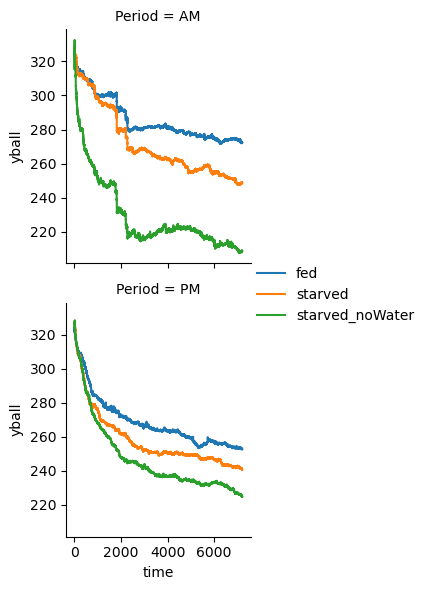

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid object with the 'Period' column as the row variable
g = sns.FacetGrid(data=GroupedDF, row='Period')

# Map a line plot of the 'yball' column over time to each facet, with the hue set to 'FeedingState'
g.map(sns.lineplot, 'time', 'yball', 'FeedingState')

# Add a legend to the plot
g.add_legend()

# Invert the y-axis of each Axes object in the FacetGrid
for ax in g.axes.flat:
    ax.invert_yaxis()

# Show the plot
plt.show()


In [13]:
GroupedDF.head()

,Period,FeedingState,time,yball
0,AM,fed,0.000000,327.660701
1,AM,fed,0.033333,327.644418
2,AM,fed,0.066667,327.720067
3,AM,fed,0.100000,327.645315
4,AM,fed,0.133333,327.677930


In [12]:
import matplotlib
print(sns.__version__)
print(matplotlib.__version__)

0.12.1
3.5.3


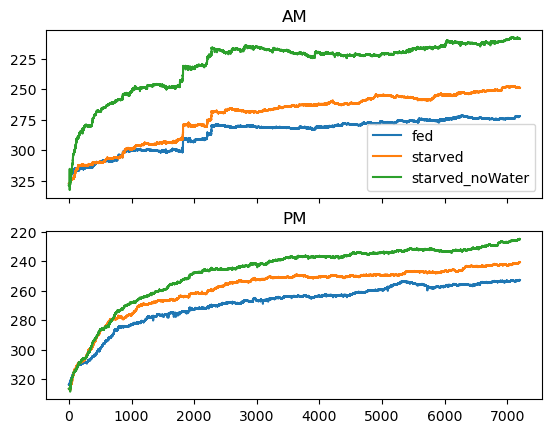

In [15]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, axes = plt.subplots(nrows=2, sharex=True)

# Plot the data for each period on a separate axis
for i, period in enumerate(GroupedDF['Period'].unique()):
    data = GroupedDF[GroupedDF['Period'] == period]
    for feeding_state in data['FeedingState'].unique():
        subset = data[data['FeedingState'] == feeding_state]
        axes[i].plot(subset['time'], subset['yball'], label=feeding_state)
    axes[i].set_title(period)
    axes[i].invert_yaxis()

# Add a legend to the first axis
axes[0].legend()

# Show the plot
plt.show()


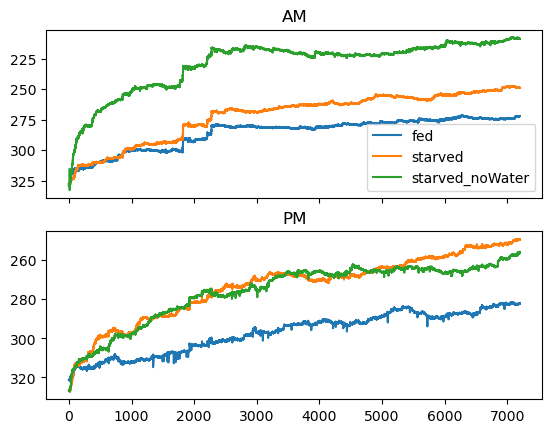

In [36]:
import matplotlib.pyplot as plt

# Filter the data to only include rows where 'Light' == 'on'
GroupedDF = GroupedDF[GroupedDF['Light'] == 'on']

# Create a figure and axes
fig, axes = plt.subplots(nrows=2, sharex=True)

# Plot the data for each period on a separate axis
for i, period in enumerate(GroupedDF['Period'].unique()):
    data = GroupedDF[GroupedDF['Period'] == period]
    for feeding_state in data['FeedingState'].unique():
        subset = data[data['FeedingState'] == feeding_state]
        axes[i].plot(subset['time'], subset['yball'], label=feeding_state)
    axes[i].set_title(period)
    axes[i].invert_yaxis()

# Add a legend to the first axis
axes[0].legend()

# Show the plot
plt.show()


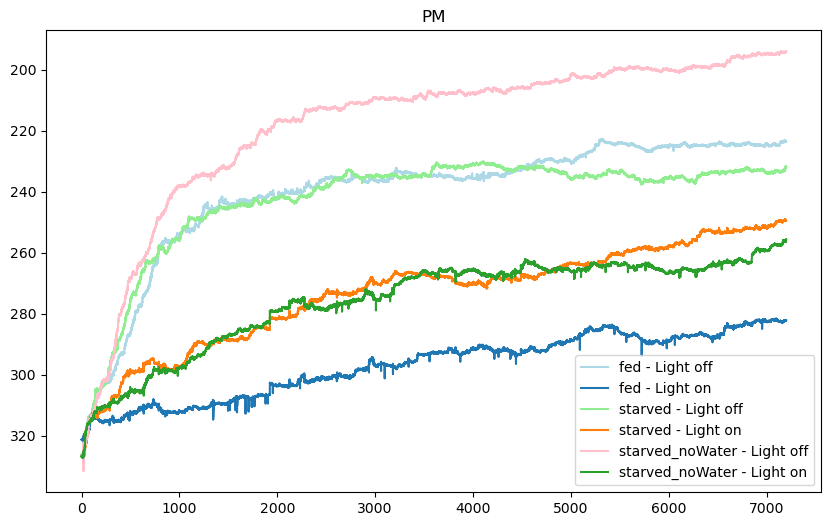

In [24]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each feeding state and light combination
colors = {('fed', 'on'): 'C0', ('fed', 'off'): 'lightblue',
          ('starved', 'on'): 'C1', ('starved', 'off'): 'lightgreen',
          ('starved_noWater', 'on'): 'C2', ('starved_noWater', 'off'): 'pink'}

# Plot the data for the PM period
data = GroupedDF[GroupedDF['Period'] == 'PM']
for feeding_state in data['FeedingState'].unique():
    subset = data[data['FeedingState'] == feeding_state]
    for light in subset['Light'].unique():
        subsubset = subset[subset['Light'] == light]
        linestyle = '-' if light == 'on' else '-'
        label = f'{feeding_state} - Light {light}'
        color = colors[(feeding_state, light)]
        ax.plot(subsubset['time'], subsubset['yball'], linestyle=linestyle, color=color, label=label)

# Set the title
ax.set_title('PM')
ax.invert_yaxis()

# Add a legend to the axis
ax.legend()

# Show the plot
plt.show()


In [35]:
GroupedDF.head()

,Period,Light,FeedingState,time,yball
0,AM,on,fed,0.000000,327.660701
1,AM,on,fed,0.033333,327.644418
2,AM,on,fed,0.066667,327.720067
3,AM,on,fed,0.100000,327.645315
4,AM,on,fed,0.133333,327.677930


In [ ]:
from scipy import stats
import numpy as np

# Define a function to compute the confidence interval for a given array of values
def confint(x, alpha=0.05):
    # Check if the input array contains at least two values
    if len(x) < 2:
        # If not, return a tuple containing two nan values
        return (np.nan, np.nan)
    
    # Compute the mean and standard error of the mean
    mean = np.mean(x)
    sem = stats.sem(x)
    
    # Compute the confidence interval
    ci = stats.t.interval(1 - alpha, len(x) - 1, loc=mean, scale=sem)
    
    return ci

# Apply the confint function to each group of rows in your original dataframe
confint_df = DataFrame.groupby(['Period', 'time'])['yball'].apply(confint).reset_index()

# Rename the columns of the resulting dataframe
confint_df.columns = ['Period', 'time', 'yball_lower', 'yball_upper']

# Merge the resulting dataframe with your grouped dataframe
GroupedDF = pd.merge(GroupedDF, confint_df, on=['Period', 'time'], how='left')


In [ ]:
# Create a line plot of the 'yball' column over time, grouped by the 'Period' column
sns.lineplot(data=GroupedDF, x='time', y='yball', hue='Period')

# Add the confidence intervals to the plot
for period, group in GroupedDF.groupby('Period'):
    plt.fill_between(group['time'], group['yball_lower'], group['yball_upper'], alpha=0.1)

# Show the plot
plt.show()

In [31]:
# Mutants

GroupedDF_TNT = Dataset.groupby(['Genotype','time',])['yball'].mean().reset_index()


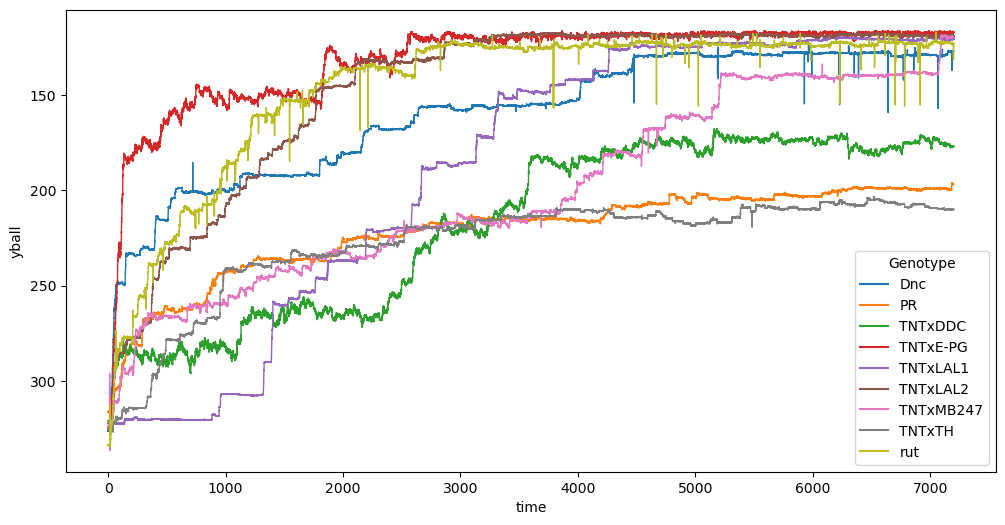

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot of the 'yball' column over time, colored by the 'Genotype' column
sns.lineplot(data=GroupedDF_TNT, x='time', y='yball', hue='Genotype', linewidth=1)

# Invert the y-axis
plt.gca().invert_yaxis()

# Show the plot
plt.show()
